In [1]:
#import required packages / set parameters
import pandas as pd
from graph_tool.all import *; import graph_tool.all as gt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing
import umap.plot
import pickle

from matplotlib.colors import ListedColormap
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)

pal = sns.color_palette('Set2')
pal.as_hex()

dxcolors = list(map(mpl.colors.rgb2hex, pal))[:4]

order = [1, 2, 0, 3]
dxcolors = [dxcolors[i] for i in order]

path='/media/Data1/tumour_genetics_git/'
vcmap = ListedColormap(dxcolors)

In [2]:
###file locations
path='/media/Data1/tumour_genetics_git/'
infile = open(path+'state_binomial_equilibrated.p','rb')

state=pickle.load(infile)
    
print("Patient state object loaded")
print(state)

Patient state object loaded
<NestedBlockState object, with base <BlockState object with 2419 blocks (27 nonempty), degree-corrected, with 50 edge covariates, for graph <Graph object, undirected, with 2419 vertices and 2418 edges, 88 internal vertex properties, 58 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f88b4578100, at 0x7f8859aec1c0>, 0), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f88b4578100, at 0x7f8859acf520>, 0), at 0x7f88b4578100>, at 0x7f8859aa37f0>, and 13 levels of sizes [(2419, 27), (27, 8), (8, 4), (4, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f88b4578220>


Graph with L0 communities colour coded


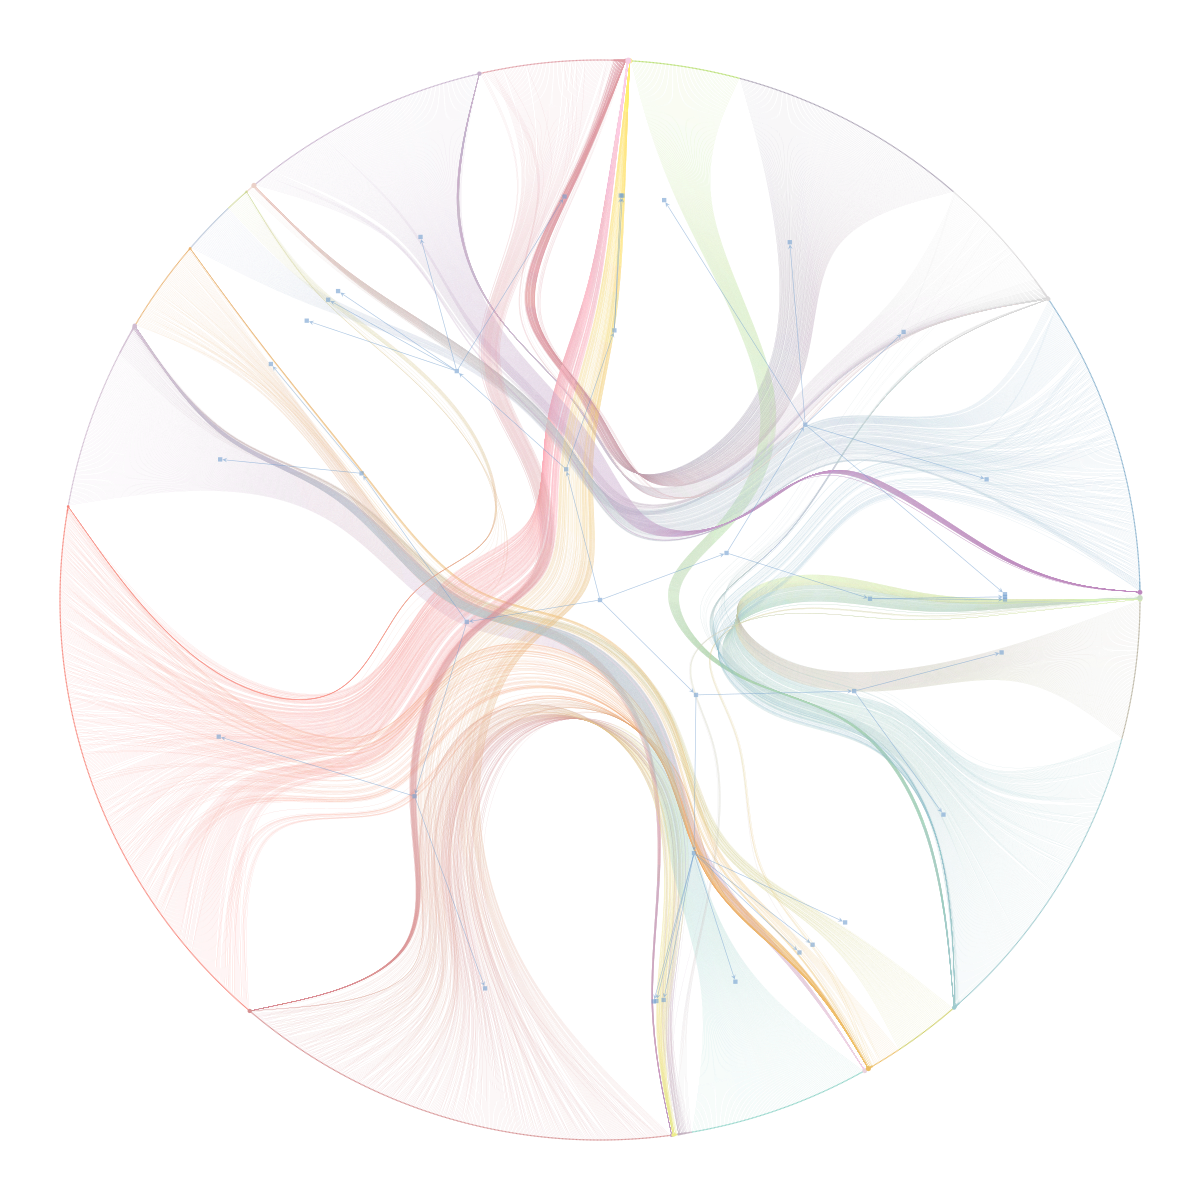

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f88b4578100, at 0x7f852544f220>,
 <GraphView object, directed, with 2459 vertices and 2458 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f88b65c73a0, at 0x7f86cdb83eb0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f88b65c73a0, at 0x7f86cdb83790>, 0), at 0x7f88b65c73a0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f88b65c73a0, at 0x7f86cdb83be0>)

In [3]:
print("Graph with L0 communities colour coded")
state.draw()

In [4]:
print("Derive community labels")
state.g.set_edge_filter(None)
state.g.set_vertex_filter(None)

levels = state.get_levels()
levels

for s in levels:
    print(s)

block0 = state.project_partition(0,0)
state.g.vertex_properties["blocks0"]=block0

block1 = state.project_partition(1,0)
state.g.vertex_properties["blocks1"]=block1

block2 = state.project_partition(2,0)
state.g.vertex_properties["blocks2"]=block2

block3 = state.project_partition(3,0)
state.g.vertex_properties["blocks3"]=block3

block4 = state.project_partition(4,0)
state.g.vertex_properties["blocks4"]=block4

block5 = state.project_partition(5,0)
state.g.vertex_properties["blocks5"]=block5

block6 = state.project_partition(6,0)
state.g.vertex_properties["blocks6"]=block6

Derive community labels
<BlockState object with 2419 blocks (27 nonempty), degree-corrected, with 50 edge covariates, for graph <Graph object, undirected, with 2419 vertices and 2924571 edges, 88 internal vertex properties, 58 internal edge properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f88b4578100, at 0x7f85253f6730>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f88b4578100, at 0x7f8859aec220>, False), at 0x7f88b4578100>, at 0x7f8859aa37f0>
<BlockState object with 24 blocks (8 nonempty), with 50 edge covariates, for graph <Graph object, undirected, with 2419 vertices and 28 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f86d630c8b0>, at 0x7f8859a1eac0>
<BlockState object with 6 blocks (4 nonempty), with 50 edge covariates, for graph <Graph object, undirected, with 24 vertices and 8 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f8859aac640>, at 0x7f8

In [5]:
print("Now you can use these for downstream survival prediction")

Now you can use these for downstream survival prediction
